In [2]:
# Desativar avisos de expiração
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
# Carregar o dataset titanic
df = sns.load_dataset('titanic')

In [4]:
# Analisar todas as colunas categóricas e todas as numéricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

print(f"Colunas categóricas: {categorical_columns}")
print(f"Colunas numéricas: {numeric_columns}")

Colunas categóricas: Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')
Colunas numéricas: Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


In [5]:
# Adicionar colunas indicando valores nulos
# Ajuda para saber em quais colunas foram inseridos os valores ND(ou qualquer outro escolhido) ou mediano
for column in categorical_columns:
    df[f'is_null_{column}'] = df[column].isnull().astype(int)
for column in numeric_columns:
    df[f'is_null_{column}'] = df[column].isnull().astype(int)

In [6]:
# Para todas as categóricas, converter para string e preencher valores ausentes com 'ND'
df[categorical_columns] = df[categorical_columns].astype(str).fillna('ND')

In [7]:
# Para todas as numéricas, preencher valores ausentes com o valor mediano
for column in numeric_columns:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

In [8]:
# Inicializar o LabelEncoder
le = LabelEncoder()

In [10]:
# Aplicar o LabelEncoder em colunas categóricas e adicionar "#" ao nome das colunas novas
for column in categorical_columns:
    df[f'#{column}'] = le.fit_transform(df[column])



In [11]:
# Exibir as primeiras linhas do dataframe atualizado
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  ...  is_null_sibsp is_null_parch is_null_fare #sex  #embarked  \
0    man  ...              0             0            0    1          2   
1  woman  ...              0             0            0    0          0   
2  woman  ...              0             0            0    0          2   
3  woman  ...              0             0            0    0          2   
4    man  ...              0             0            0    1          2   

   #class  #who  #deck  #embark_town  #alive  
0       2     1      7             2       0 

In [12]:
# Exibir as informações do dataframe atualizado
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   survived             891 non-null    int64  
 1   pclass               891 non-null    int64  
 2   sex                  891 non-null    object 
 3   age                  891 non-null    float64
 4   sibsp                891 non-null    int64  
 5   parch                891 non-null    int64  
 6   fare                 891 non-null    float64
 7   embarked             891 non-null    object 
 8   class                891 non-null    object 
 9   who                  891 non-null    object 
 10  adult_male           891 non-null    bool   
 11  deck                 891 non-null    object 
 12  embark_town          891 non-null    object 
 13  alive                891 non-null    object 
 14  alone                891 non-null    bool   
 15  is_null_sex          891 non-null    int

In [13]:
df.head(5).T

,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22.0,38.0,26.0,35.0,35.0
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
class,Third,First,Third,First,Third
who,man,woman,woman,woman,man


In [14]:
df.groupby(['#embarked','embarked']).count()

,,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,...,is_null_age,is_null_sibsp,is_null_parch,is_null_fare,#sex,#class,#who,#deck,#embark_town,#alive
#embarked,embarked,,,,,,,,,,,,,,,,,,,,,
0,C,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
1,Q,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
2,S,644,644,644,644,644,644,644,644,644,644,...,644,644,644,644,644,644,644,644,644,644
3,nan,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [15]:
df.groupby(['#class','class']).count()

,,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,...,is_null_age,is_null_sibsp,is_null_parch,is_null_fare,#sex,#embarked,#who,#deck,#embark_town,#alive
#class,class,,,,,,,,,,,,,,,,,,,,,
0,First,216,216,216,216,216,216,216,216,216,216,...,216,216,216,216,216,216,216,216,216,216
1,Second,184,184,184,184,184,184,184,184,184,184,...,184,184,184,184,184,184,184,184,184,184
2,Third,491,491,491,491,491,491,491,491,491,491,...,491,491,491,491,491,491,491,491,491,491


In [16]:
df.groupby(['#deck','deck']).count()

,,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,is_null_age,is_null_sibsp,is_null_parch,is_null_fare,#sex,#embarked,#class,#who,#embark_town,#alive
#deck,deck,,,,,,,,,,,,,,,,,,,,,
0,A,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
1,B,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
2,C,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
3,D,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
4,E,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
5,F,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
6,G,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,nan,688,688,688,688,688,688,688,688,688,688,...,688,688,688,688,688,688,688,688,688,688


In [24]:
# verificar a correlação do deck com os sobreviventes
# A importância dessa troca do categórico para o numérico e a observação de correlação.
df[['#deck','survived']].corr()

,#deck,survived
#deck,1.000000,-0.294804
survived,-0.294804,1.000000


<Axes: xlabel='#deck', ylabel='survived'>

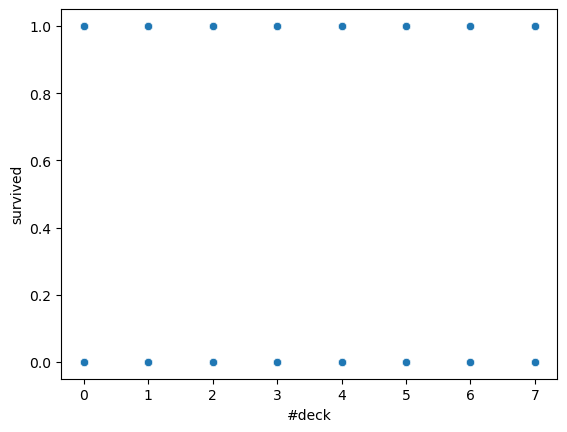

In [15]:
sns.scatterplot(df[['#deck','survived']], x='#deck', y='survived')

<Axes: >

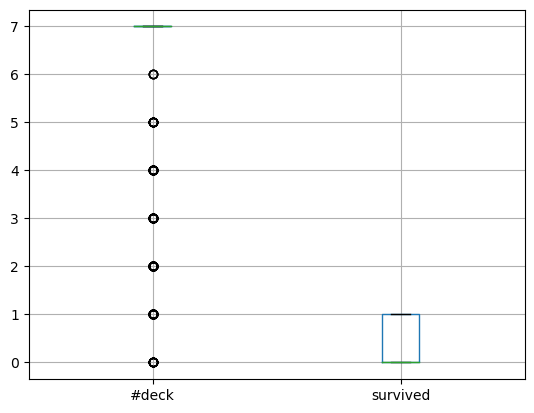

In [17]:
df[['#deck','deck','survived']].boxplot()

In [18]:
dfx = df.filter(regex=r'^#').columns

In [19]:
dfx

Index(['#sex', '#embarked', '#class', '#who', '#deck', '#embark_town',
       '#alive'],
      dtype='object')

In [20]:
dfy = df[dfx]

In [21]:
dfy

,#sex,#embarked,#class,#who,#deck,#embark_town,#alive
0,1,2,2,1,7,2,0
1,0,0,0,2,2,0,1
2,0,2,2,2,7,2,1
3,0,2,0,2,2,2,1
4,1,2,2,1,7,2,0
...,...,...,...,...,...,...,...
886,1,2,1,1,7,2,0
887,0,2,0,2,1,2,1
888,0,2,2,2,7,2,0
889,1,0,0,1,2,0,1


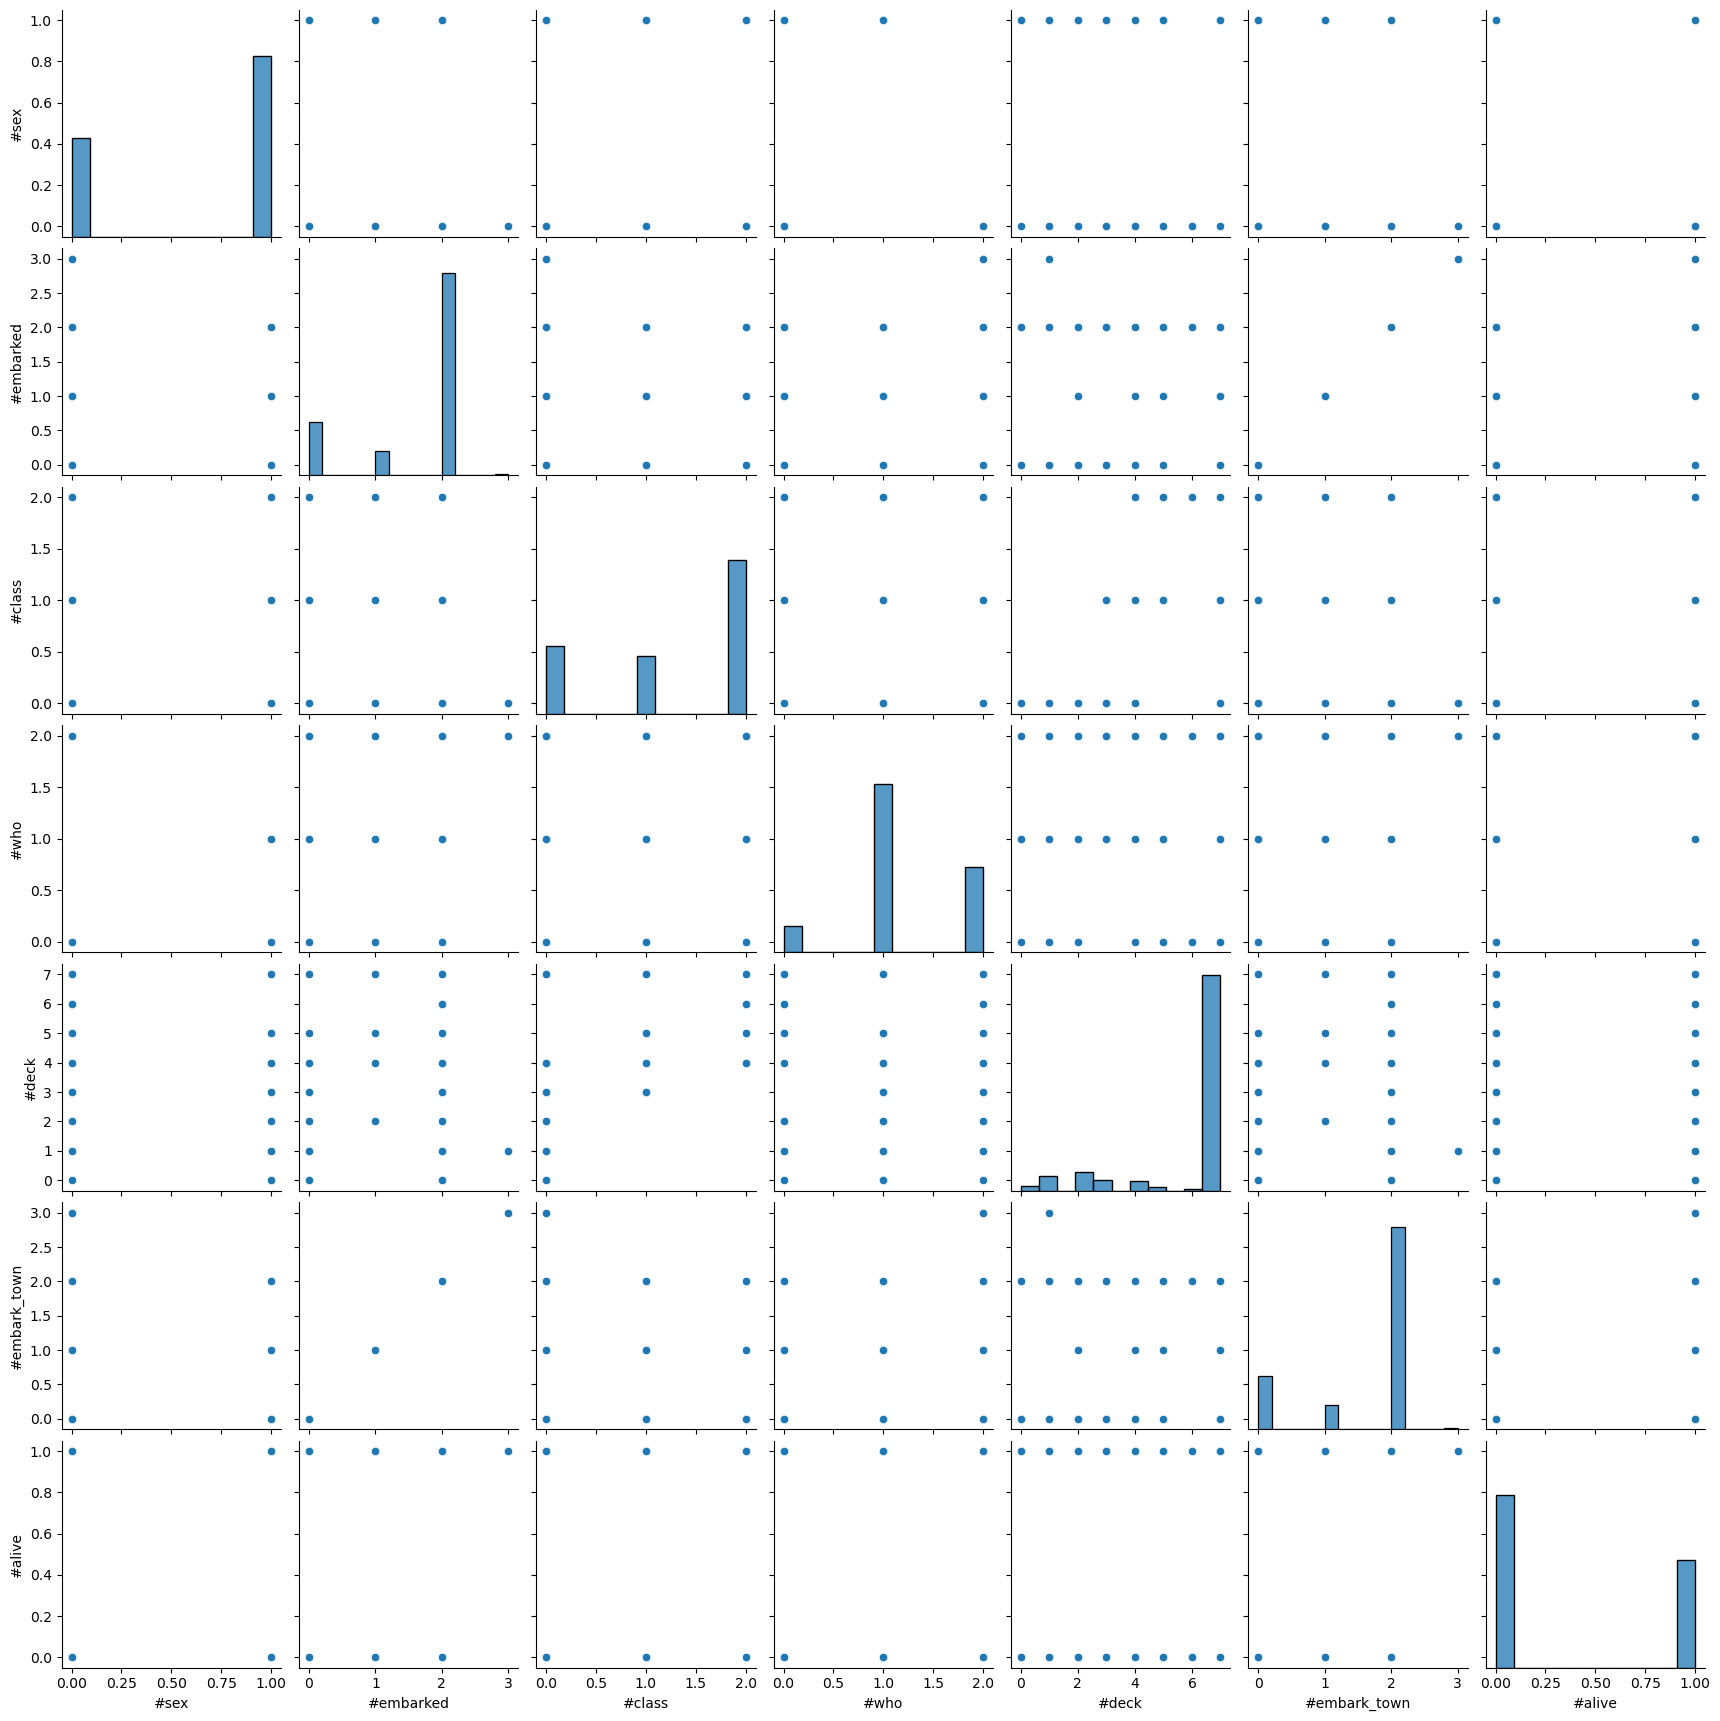

In [22]:
sns.pairplot(dfy)

In [25]:
# Verificar a importancia das variáveis com o classificador Random Forest

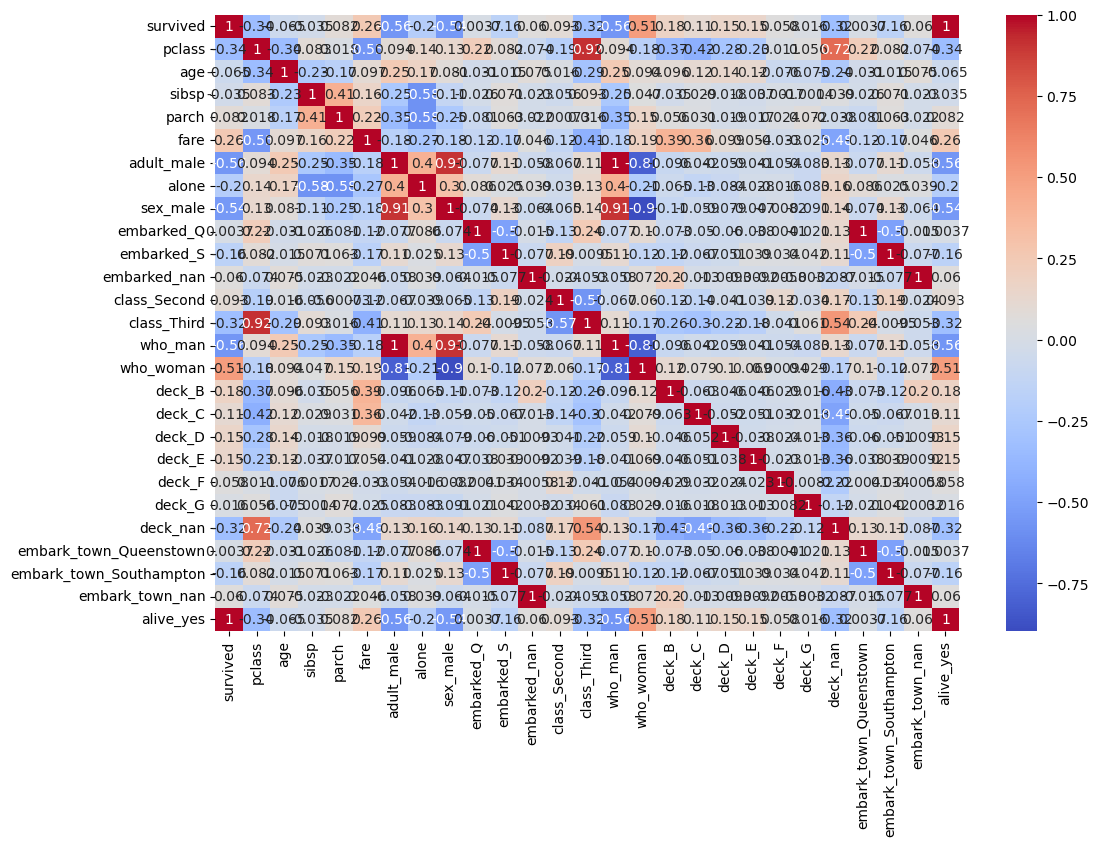

alive_yes                  0.577748
who_man                    0.073661
adult_male                 0.073561
sex_male                   0.059027
who_woman                  0.040196
fare                       0.039044
class_Third                0.028816
age                        0.028742
pclass                     0.022954
sibsp                      0.012848
deck_nan                   0.012234
parch                      0.005880
alone                      0.003929
deck_E                     0.003460
embarked_S                 0.003223
embark_town_Southampton    0.003149
deck_B                     0.002923
class_Second               0.002440
deck_D                     0.001828
embark_town_Queenstown     0.001343
embarked_Q                 0.001251
deck_C                     0.001068
deck_G                     0.000420
deck_F                     0.000247
embark_town_nan            0.000005
embarked_nan               0.000002
dtype: float64


In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Carregar o dataset titanic
df = sns.load_dataset('titanic')

# Identificar colunas categóricas e numéricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Preencher valores ausentes
df[categorical_columns] = df[categorical_columns].astype(str).fillna('ND')
for column in numeric_columns:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

# Codificar variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Calcular matriz de correlação
correlation_matrix = df_encoded.corr(method='pearson')

# Visualizar heatmap de correlações
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Análise de Importância de Características usando Random Forest
from sklearn.ensemble import RandomForestClassifier

# Suponha que `y` é o target e `X` são as features
y = df['survived']
X = df_encoded.drop('survived', axis=1)

rf = RandomForestClassifier()
rf.fit(X, y)

# Obter a importância das características
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)